# MP1 - Principal Component Analysis

## Principal Component Analysis

### Overall Task

The task for the coding assignment will be to explore the commonly used method of principal component analysis (PCA). Specifically, this assignment will focus on:  
(a) gaining a visual understanding for what these 'principal components' do and  
(b) how we can use them to reduce the dimensionality of our dataset while maintining as much information as possible.  

### Background

#### Eigenvalue Decomposition

For a given square matrix $A$ we can decompose the matrix into its eigenvector matrix $Q$ and a diagonal matrix $\Lambda$ which has zeros everywhere but the diagonal. The eigenvector matrix $Q$ has columns which are linearly independent and are orthogonal to one another. Usually $Q^* Q = I$. When this is the case the decomposition is described as

$$A = Q \Lambda Q^*$$

The eigenvalues can be calculated by solving 

$$\text{det}(A-\lambda I) = 0$$

while the eigenvector for the given eigenvalue can be found by solving

$$A v = \lambda v$$

The columns of $Q$ are the eigenvectors. The diagonal values are the eigenvalues. Also note that only diagonalizable matrices can be decomposed this way.


#### Singular Value Decomposition

For any $m \times n$ matrix $A$, it can be decomposed into a $m \times m$ unitary matrix $U$, $m \times n$ singular value matrix $\Sigma$ and $n \times n$ unitary matrix $V$. $U$ and $V$ have the property $U^* U = I$ and $V^* V = I$ respectively. The singular values $\sigma$ are in the diagonal of $\Sigma$ and all other values are zero. The decomposition is

$$A = U \Sigma V^*$$

The relationship between all three can be described with 

$$Av = \sigma u \text{ and } A^* u = \sigma v$$

One can relate SVD with the eigenvalue decomposition by noting that 

$$A^* A = V \Sigma U^* U \Sigma V^* = V |\Sigma|^2 V^*$$

Where for the eigenvalue decomposition $Q = V$ and and $\Lambda = |\Sigma|^2$. Similarly, for $A A^*$ the eigenvector matrix $Q = U$ while $\Lambda$ is the same.

#### Principal Component Analysis (PCA)

Principal component analysis focuses on trying to find the vectors which point in the direction of greatest variance in the data presented. These vectors are all linearly independent and orthogonal. To do this we need to find the eigenvalues and eigenvectors of the covariance matrix of the data.

Define our data as the matrix $X$ with dimensions $m \times n$ and the demeaned data as $Y = X - \bar{X}$ where $\bar{X}$ is the mean over the $n$ columns for X.  Then, the covariance matrix is

$$\text{Cov}(X) = Y Y^*$$

Fortunately, the covariance matrix is always diagonalizable thus we can find an eigenvalue decomposition. Thus, we have

$$\text{Cov}(X) = Q \Lambda Q^*$$

and our principal components are the columns of the matrix $Q$ and according to our analysis above we can also find the matrix $Q$ by taking the SVD of $Y$ and keeping the $U$ matrix. Additionally, since the columns of the matrix $Q$ are orthonormal vectors, their respective eigenvalues $\lambda$ indicate the strength of the variance in the data in the direction indicated by the eigenvector. Thus, the larger the eigenvalue, the more variance in the direction of the respective eigenvector and vice versa.

This raises the question, if only a few eigenvalues are large for our covariance matrix, then does that mean that only a few eigenvectors are necessary to describe our data? Indeed as we will see this is the case and is the idea behind PCA.

***Limiting the Number of Eigenvectors***

Continuing in this vein of thinking let us keep only the eigenvectors of the top $N$ eigenvalues. Then, our eigenvector matrix has dimensions $m \times N$. Let us call this matrix $Q_N$. If we want to find the weights for the eigenvectors for a specific demeaned vector of size $m$ called $y$ then

$$w = Q_N^* y$$

and in order to reconstruct our original vector we simply do

$$\tilde{y} = Q_N w$$

Note that $\tilde{y}$ will most likely not be exactly like $y$ since $Q_N^*$ will have a null space with dimension larger than $0$. It is very likely that $y$ is partially in the null space of $Q_N$ and thus it can never be properly reconstructed but this is acceptable as long as $\tilde{y}$ is a good approximation of $y$. In this assignment you will investigate how choosing $N$ affects reconstruction by directly projecting onto the space of remaining eigenvectors.

### NumPy Warmup (for practice - not graded)

##### Shape of arrays

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
A = np.random.randint(5, size=(3, 4))
B = np.random.randint(5, size=(5, 3))
print(A, A.shape)
print("------")
print(B, B.shape)

[[1 0 1 0]
 [1 2 4 0]
 [1 1 3 0]] (3, 4)
------
[[3 1 1]
 [1 4 3]
 [4 1 0]
 [3 1 1]
 [3 1 1]] (5, 3)


##### Reshaping arrays

In [3]:
A = A.reshape((4, 3))
print(A, A.shape)

[[1 0 1]
 [0 1 2]
 [4 0 1]
 [1 3 0]] (4, 3)


In [4]:
C = A.flatten()
print(C, C.shape)

[1 0 1 0 1 2 4 0 1 1 3 0] (12,)


##### Array slicing

In [5]:
C = B[:3, :]
print(C, C.shape)

[[3 1 1]
 [1 4 3]
 [4 1 0]] (3, 3)


In [6]:
C = B[:, :1]
print(C, C.shape)

[[3]
 [1]
 [4]
 [3]
 [3]] (5, 1)


In [7]:
# mean along axis 0
C = np.array([[1, 2], [3, 4]])
C_mean = np.mean(C, axis=0)
print(C_mean, C_mean.shape)

# mean along axis 1
C = np.array([[1, 2], [3, 4]])
C_mean = np.mean(C, axis=1)
print(C_mean, C_mean.shape)

[2. 3.] (2,)
[1.5 3.5] (2,)


##### Element-wise operations

In [8]:
C = A * 2
print(C, C.shape)

[[2 0 2]
 [0 2 4]
 [8 0 2]
 [2 6 0]] (4, 3)


In [9]:
C = A ** 2
print(C, C.shape)

[[ 1  0  1]
 [ 0  1  4]
 [16  0  1]
 [ 1  9  0]] (4, 3)


In [10]:
C = A / 2
print(C, C.shape)

[[0.5 0.  0.5]
 [0.  0.5 1. ]
 [2.  0.  0.5]
 [0.5 1.5 0. ]] (4, 3)


##### Matrix operations

In [11]:
# transpose
C = A.T
print(C, C.shape)

[[1 0 4 1]
 [0 1 0 3]
 [1 2 1 0]] (3, 4)


In [12]:
# multiplication
print(A.shape, B.shape)
C = np.matmul(A, B.T)
print(C, C.shape)

(4, 3) (5, 3)
[[ 4  4  4  4  4]
 [ 3 10  1  3  3]
 [13  7 16 13 13]
 [ 6 13  7  6  6]] (4, 5)


In [13]:
# inverse
C = np.array([[1, 2], [3, 4]])
print(C, C.shape)
print("-------")
C_inv = np.linalg.inv(C)
print(C_inv, C_inv.shape)

[[1 2]
 [3 4]] (2, 2)
-------
[[-2.   1. ]
 [ 1.5 -0.5]] (2, 2)


##### Plotting data using matplotlib

X: [[ 3]
 [19]
 [ 7]
 [ 5]
 [11]
 [13]
 [ 4]
 [ 2]
 [13]
 [ 9]] (10, 1)
Y: [[13]
 [ 7]
 [ 6]
 [ 6]
 [ 6]
 [ 2]
 [11]
 [18]
 [ 3]
 [ 1]] (10, 1)


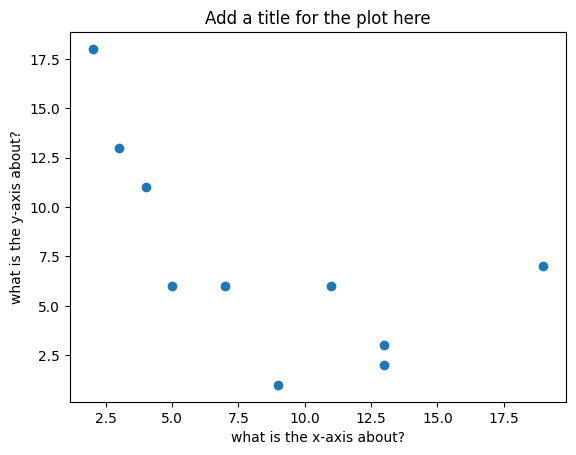

In [18]:
plt.figure()
plt.title('Add a title for the plot here')

X = np.random.randint(20, size=(10, 1))
print("X:", X, X.shape)
Y = np.random.randint(20, size=(10, 1))
print("Y:", Y, Y.shape)

# scatter plot
plt.scatter(X, Y)

plt.xlabel('what is the x-axis about?')
plt.ylabel('what is the y-axis about?')
plt.show()

In [ ]:
# try to experiment with subplots here

# example - https://matplotlib.org/stable/gallery/lines_bars_and_markers/scatter_star_poly.html#sphx-glr-gallery-lines-bars-and-markers-scatter-star-poly-py

### Plotting the Principal Components - Samples from Gaussians

The first step for this assignment will be to sample data points from a two dimensional gaussian distribution and compute the principal components of the data points. There are several ways to do this. One way, for example, is to compute the covariance matrix and then the eigenvalue and eigenvector decomposition. Another is using the SVD of the data matrix. In both cases make sure that the matrix has been properly demeaned. Usually for PCA we only keep the top $N$ components, in this simple case we will keep both.

Feel free to use the variety of functions offered by numpy for the above calculations, however you are not allowed to use one function which computes PCA in one step such as sklearn.pca.

The distribution of a two dimensional gaussian is:

$$\mathcal{N}(\mu, \Sigma) = \frac{\exp\Big(-\frac{1}{2}(x - \mu)^T \Sigma (x - \mu)\Big)}{\sqrt{(2 \pi)^d |\Sigma|}}$$

Sample a total of 500 points from the gaussian distribution and use:

$$
\mu = \begin{bmatrix}
1 \\
2
\end{bmatrix},
\Sigma = \begin{bmatrix}
2 & 1 \\
1 & 2
\end{bmatrix}
$$

Calculate the principal components for the sampled data and overlay the two eigenvectors over the data which should be plotted as a scatter plot. Scale the eigenvectors appropriately so that you can clearly see their direction, relation to each other and to the data. Make sure to set the origin for the eignevectors as the mean of the points. Comment on the resulting plot.

In [3]:
import numpy as np
import os
import matplotlib.pyplot as plt

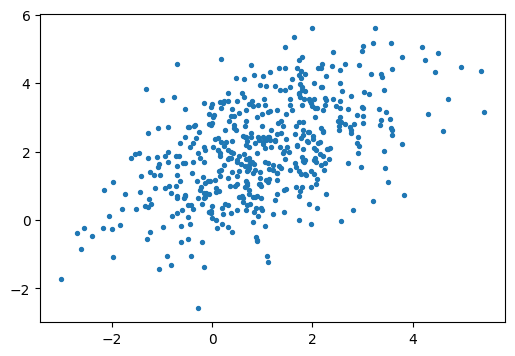

In [10]:
# Start with sampling 500 points from the given 2-dimensional normal distribution
from scipy.stats import multivariate_normal

mu = np.array([1, 2])
sigma = np.array([[2, 1], [1, 2]])
pts = multivariate_normal.rvs(mean=mu, cov=sigma, size=500)

plt.figure(figsize=(6,4))
plt.scatter(pts[:, 0], pts[:, 1],s=8)
plt.show()

In [11]:
# Implement the PCA Function

# Input - data of shape MxN (M=features, N=samples)
#       - n_comps = number of PCs to find

# Output - eigenvalues of shape (n_comps,)
#        - eigenvectors of shape (n_comps, M)

from scipy.sparse.linalg import eigsh

def pca(data, n_comps):
    x_hat = data - np.mean(data, axis=1, keepdims=True)
    cov = np.cov(x_hat, rowvar=True)
    eigenvalues, eigenvectors = eigsh(cov, k=n_comps)
    return eigenvalues, eigenvectors

In [13]:
# TODO: center the data feature wise
pts_centered = pts.T - np.mean(pts.T, axis=0)

# TODO: perform PCA on sampled data using function written above
# NOTE: features - rows, samples - columns
vals, vecs = pca(pts_centered, n_comps=2)
print(vals, vals.shape)
print(vecs, vecs.shape)


[2.77555756e-17 9.81451974e-01] (2,)
[[-0.70710678 -0.70710678]
 [-0.70710678  0.70710678]] (2, 2)


C:\Users\13611\AppData\Local\Temp\ipykernel_26732\3290737031.py:14: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  eigenvalues, eigenvectors = eigsh(cov, k=n_comps)


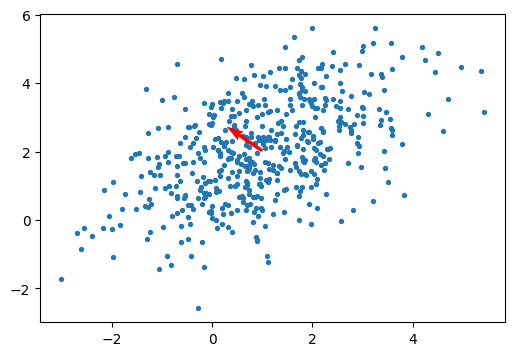

In [15]:
# Plot the directions in which the eigenvectors point - can scale the vectors for visual clarity

plt.figure(figsize=(6,4))
# TODO:
plt.scatter(pts[:, 0], pts[:, 1], s=8)


# TODO - plot the eigenvectors usint plt.quiver
# https://matplotlib.org/stable/gallery/images_contours_and_fields/quiver_simple_demo.html#sphx-glr-gallery-images-contours-and-fields-quiver-simple-demo-py
origin = np.mean(pts, axis=0)

for i in range(len(vals)):
    plt.quiver(*origin, vecs[0, i] * vals[i], vecs[1, i] * vals[i], 
               angles='xy', scale_units='xy', scale=1, color='r')

plt.show()

*Comment Here*

### Load Data - Medical Images

Now we will move to more sophisticated datasets. Load the medical images we want to apply PCA to. For this assignment we will be using CT images, many of which are of the lungs as well other body parts. All of these images have lesions in them. The images are saved in an array as a .npy file and have dimensions of $128 \times 128$. There should be a total of $8351$ images. Make sure to flatten each image to get a $8351 \times 128^2$ array after you load and visualize. Make sure to choose the appropriate path to the .npy file in order to load.

In [17]:
# Loading the Dataset
path = os.getcwd() + '/pca_dataset.npy'
images = np.load(path).astype(np.float32)
images.shape

(8351, 128, 128)

2986


<Figure size 640x480 with 0 Axes>

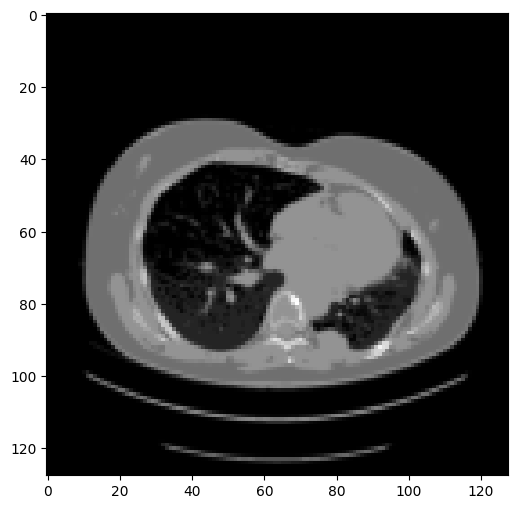

In [21]:
# Select an image randomly and visualize it using plt.imshow()

# TODO - random index
idx = np.random.randint(0, images.shape[0])
print(idx)

plt.figure()

# TODO
plt.figure(figsize=(6, 6))
plt.imshow(images[idx], cmap='gray')

plt.show()

In [24]:
# TODO - Flatten the 128x128 features for each image in the dataset

imgs = images.reshape(images.shape[0], -1)
print(imgs.shape)

(8351, 16384)


### Principial Components - Medical Images

#### Eigenvalues and Eigenvectors

Now that we have our matrix composed of data points, compute the principal components for our images. Note that we will be reducing the dimension across the number of images, i.e. $8351$, not the size of the images. Once you have found the principal components keep only the top $N=2000$ for our dataset. Make sure that the remaining eigenvectors have dimension $128^2 \times N$. Transpose the data matrix as necessary in order to get this result. Plot the eigenvalues and comment on what you see. How many core or important components exist? Can this plot be used to justify this method for the purpose of dimensionality reduction?

In [27]:
%%time
# TODO - Perform PCA on the flattened images using the same pca() function written before
# NOTE - THIS WILL TAKE A LONG TIME! AT LEAST 7 MINUTES
vals, vectors = pca(imgs.T, 2000)
print("Done")

Done
CPU times: total: 59min 14s
Wall time: 10min 29s


In [43]:
# save the eigenvalues and eigenvectors to a .npy file
import pickle

with open('vals.npy', 'wb') as f:
    pickle.dump(vals, f)

with open('vectors.npy', 'wb') as f:
    pickle.dump(vectors, f)  

# # Can reload them if needed.
# with open('vals.npy', 'rb') as f:
#     vals = pickle.load(f)

# with open('vectors.npy', 'rb') as f:
#     vectors = pickle.load(f)

vals = vals[::-1]
vectors = vectors[:, ::-1]


vals.shape, vectors.shape

((2000,), (16384, 2000))

Text(0, 0.5, 'Eiegenvalue')

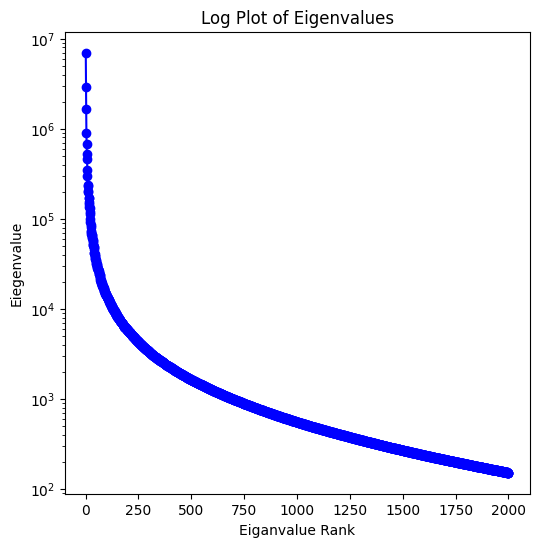

In [44]:
# Plot eigenvalues in decreasing order using plt.plot()

x = np.arange(vals.shape[0]-1,-1,-1)
plt.figure(figsize=(6,6))

# TODO:
plt.plot(np.arange(1, 2000 + 1), vals, marker='o', linestyle='-', color='b')

plt.yscale('log')
plt.title('Log Plot of Eigenvalues')
plt.xlabel('Eiganvalue Rank')
plt.ylabel('Eiegenvalue')

*Comment Here*

Now plot the mean image (use np.mean() along the image axis) and the eigenvectors for the $1^{st}$, $5^{th}$ $20^{th}$, $100^{th}$ and $1000^{th}$ components. Comment on how they look.

(16384, 2000)


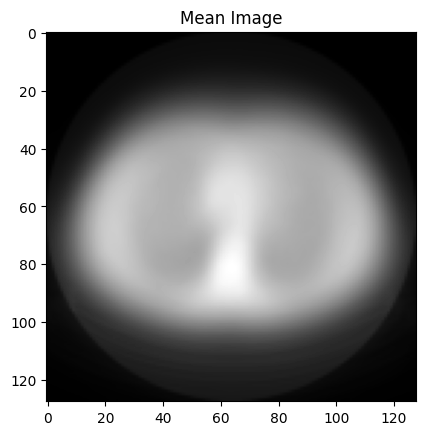

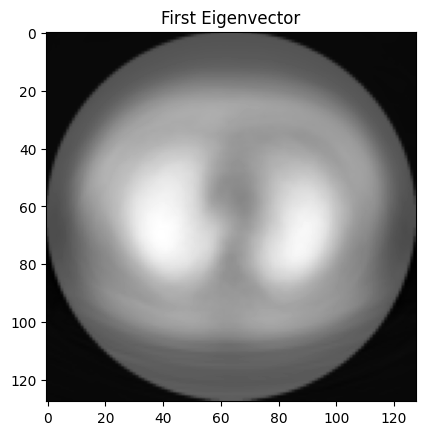

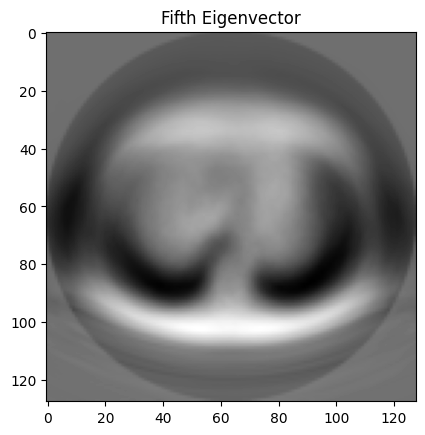

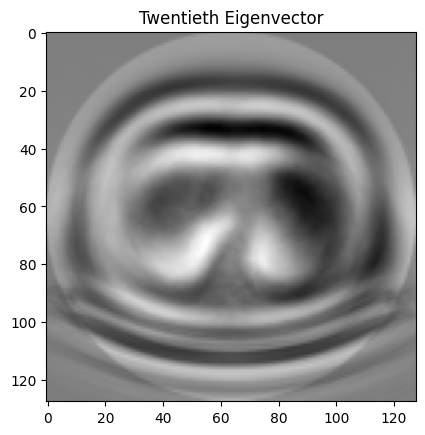

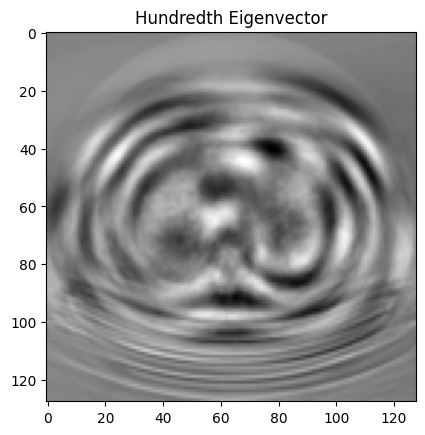

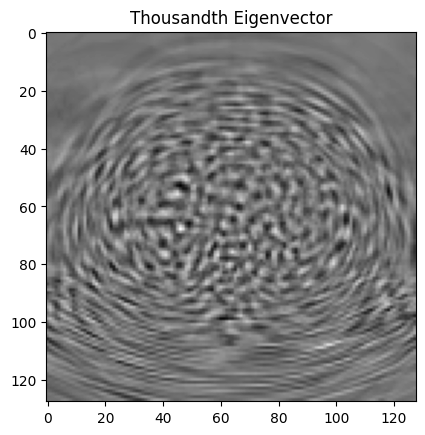

In [45]:
# TODO - Plot eigenvectors here. Fill in the first argument to plt.imshow() in each case.
# NOTE - Eigenvectors can be plotted as a 128x128 image

mean_image = np.mean(images, axis=0)

print(vectors.shape)

plt.figure()
plt.title('Mean Image')
plt.imshow(mean_image, cmap='gray')
plt.show()

plt.figure()
plt.title('First Eigenvector')
plt.imshow(vectors[:, 0].real.reshape(128, 128), cmap='gray')
plt.show()

plt.figure()
plt.title('Fifth Eigenvector')
plt.imshow(vectors[:, 4].real.reshape(128, 128), cmap='gray')
plt.show()

plt.figure()
plt.title('Twentieth Eigenvector')
plt.imshow(vectors[:, 19].real.reshape(128, 128), cmap='gray')
plt.show()

plt.figure()
plt.title('Hundredth Eigenvector')
plt.imshow(vectors[:, 99].real.reshape(128, 128), cmap='gray')
plt.show()

plt.figure()
plt.title('Thousandth Eigenvector')
plt.imshow(vectors[:, 999].real.reshape(128, 128), cmap='gray')
plt.show()

It seems that the larger egenvector goes, the smaller portion of image it occupies. The first few eigen vectors can clearly descibe the pattern of the image.

#### Projecting Onto the Space of Eigenvectors

Now let's see what information our top principal components have stored. Create the projection matrix for the space created by our eigenvectors. We will then project several medical images from our dataset onto this space to see how much of the original image is in this space. As a reminder the projection matrix is defined as:

$$P = B(B^T B)^{-1} B^T$$

where $B$ is a matrix where all columns constitute a basis for a space and are linearly independent. For this assignment create the projection matrix for the first $50$, $100$, $250$, $500$, $1000$ and $2000$ components. Then project four randomly selected images from our dataset onto the spaces created by the eigenvectors. Show both the projections and the originals using subplots. For one of those images plot the mean squared error (MSE) between the original and projection for the different number of eigenvector components. Make sure to demean the images before projecting and to then add the mean afterwards.

Comment on the quality of the projection images for different number of components. Relate this with the eigenvector visualizations and eigenvalue plot. It should hopefully be clear by this point that almost all of the information can be maintained with a few components (compared to the full dataset) and little error making PCA a useful tool in reducing the dimensionality of data (especially features) for the purposes of storing and training machine learning models.

In [46]:
# Projection: Returns the projected image on the space spanned by the vectors matrix cols

# TODO

# inputs:
# - img: a single original image
# - vectors: eigenvectors computed earlier
# - num_comps: how many PCs to use
# - mean: mean image computed using the full data (np.mean() along image axis)

# outputs:
# a single image after projection

# NOTE - make sure mean is added back after projection is computed, and before returning the projected image
def projection(img, vectors, num_comps, mean):
    ##### TODO #####
    img_hat = img.flatten() - mean.flatten()
    B = vectors[:, :num_comps]
    P = B @ (B.T @ img_hat)
    proj = P + mean.flatten()
    proj = proj.reshape(128, 128)
    return proj

# Plot_imgs: Plots the images as a subplot, this is a helper function
# inputs:
# - num_imgs - how many images to plot
# - images - 3D array - num_imgs x height x width
# - suptitle - string for title of the plot
def plot_imgs(num_imgs, images, suptitle=''):
    fig, axs = plt.subplots(1, num_imgs, figsize=(15,15))
    print(suptitle)
    for i in range(num_imgs):
        axs[i].imshow(images[i,:,:], cmap='gray')
    plt.show()    
    return

Original Images


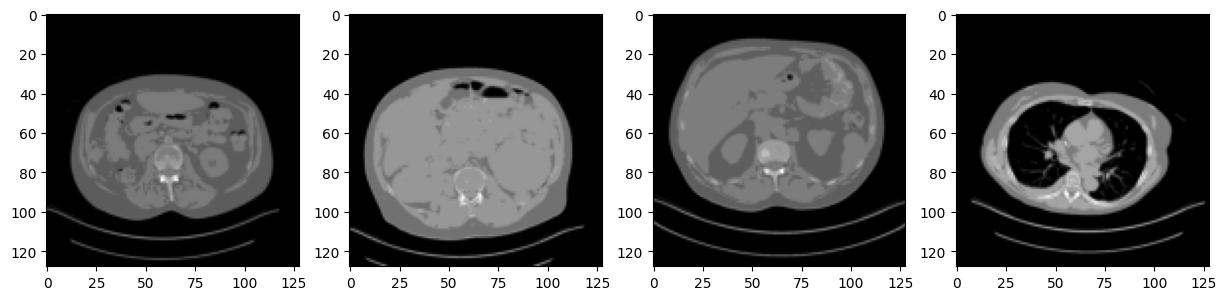

Number of Eigenvector Components: 50


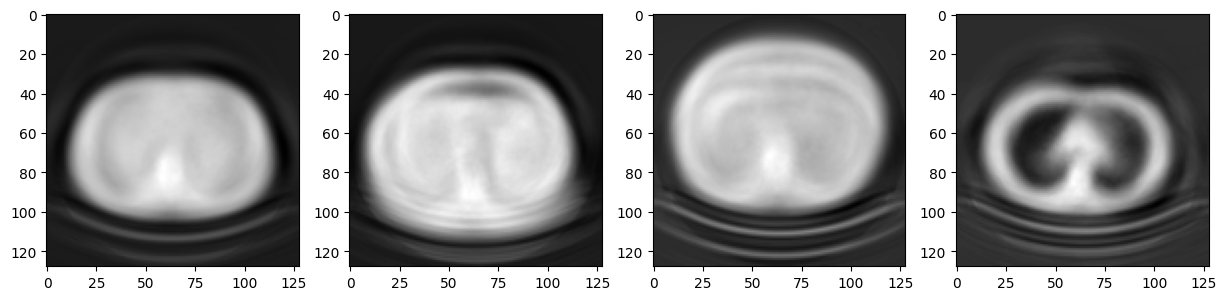

Number of Eigenvector Components: 100


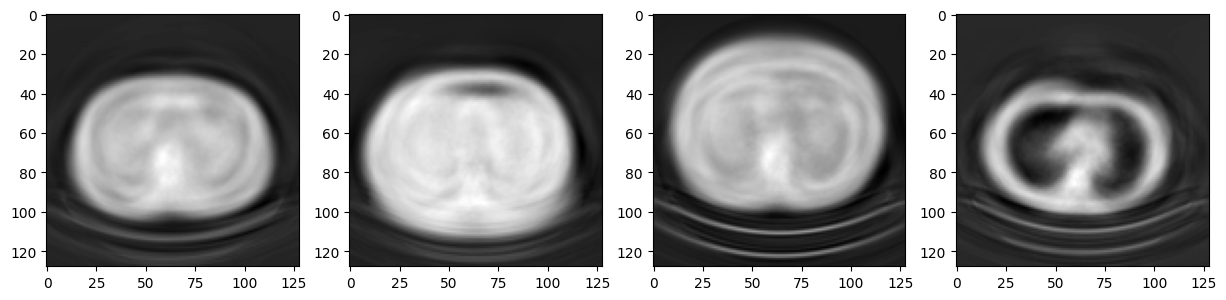

Number of Eigenvector Components: 250


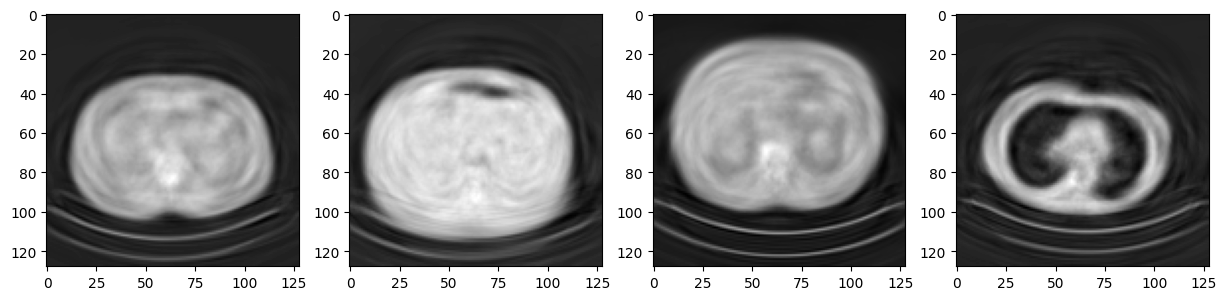

Number of Eigenvector Components: 1000


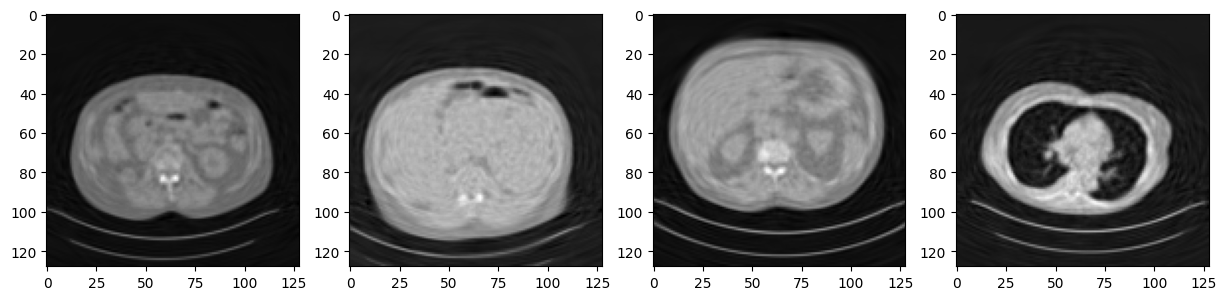

Number of Eigenvector Components: 2000


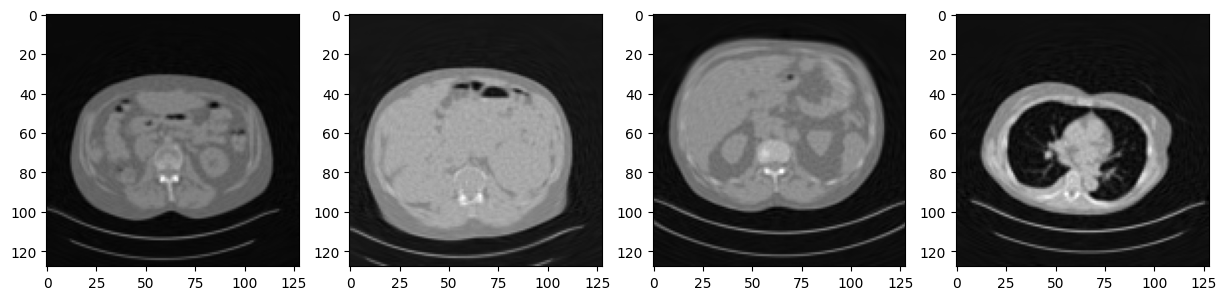

In [47]:
num_comps = [50, 100, 250, 1000, 2000]

# TODO - select 4 ids randomly
idx = np.random.choice(images.shape[0], 4, replace=False)
four = np.array([images[idx[0]], images[idx[1]], images[idx[2]], images[idx[3]]])

# TODO - plot original images using plot_imgs given above
plot_imgs(4, four, suptitle='Original Images')

out = np.zeros((len(num_comps), four.shape[0], four.shape[1], four.shape[2]))
for n in range(len(num_comps)):
    for i in range(four.shape[0]):
        # TODO
        out[n, i, :, :] = projection(four[i], vectors, num_comps[n], mean_image)
    # TODO
    plot_imgs(four.shape[0], out[n], suptitle=f'Number of Eigenvector Components: {num_comps[n]}')

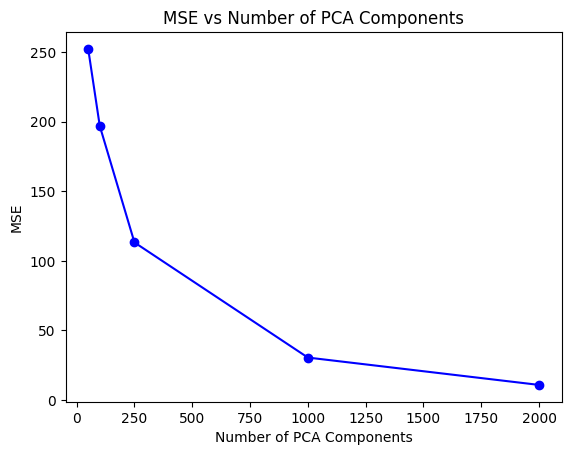

In [48]:
# TODO - Mean Squared Error function
def mse(a, b):
    error = np.mean((a - b) ** 2)
    return error

# Plot here
mse_vals = []
for n in range(len(num_comps)):
    mse_value = 0
    for i in range(four.shape[0]):
        projected_image = projection(four[i], vectors, num_comps[n], mean_image)
        mse_value += mse(four[i], projected_image)
    mse_value /= four.shape[0]
    mse_vals.append(mse_value)

plt.figure()
plt.title('MSE vs Number of PCA Components')
# TODO
plt.plot(num_comps, mse_vals, marker='o', linestyle='-', color='b')
plt.xlabel('Number of PCA Components')
plt.ylabel('MSE')
plt.show()

As the number of PCA components increases, MSE reduces. For the first few pcas, MSE reduces significantly. When MSE reaches 1000, it reduces slower than the first 1000 components. Thus the first few principal components contains the most essential components of the image.

#### Dimensionality Reduction

As mentioned above, PCA can be useful in reducing the dimensionality of data which can save storage space. Assume $N=2000$ components is acceptable and that each value in an array requires 4 bytes. Calculate the memory necessary for storing the principal components as well as the weights for each image. Then compare with the total amount of memory for storing all of the images. Keep your final answers in the GB units.

*Comment Here*

PCA: $ 0.5\text{ GB}$

Data: $0.2\text{ GB}$